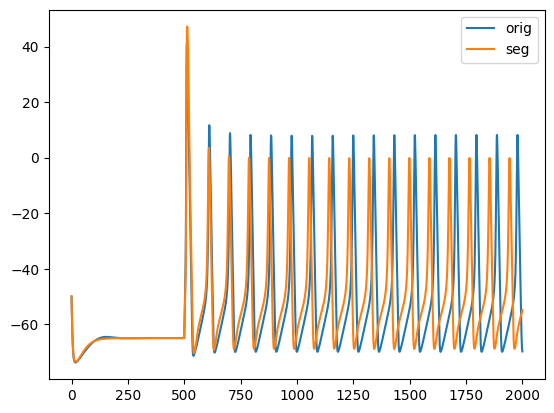

In [1]:
import numpy as np
import matplotlib.pyplot as plt

orig_v = np.load("./orig/orig_v.npy")
seg_v = np.load("./seg/seg_v.npy")

plt.plot(orig_v, label = 'orig')
plt.plot(seg_v, label = 'seg')
plt.legend()

In [ ]:
import numpy as np
import math


def vtrap(x,y):
    if np.any(np.abs(x/y) < 1e-6):
        vtrap = y*(1 - x/y/2)
    else:
        vtrap = x/(np.exp(x/y) - 1)
    return vtrap


v = np.linspace(-150, 20, 1000)

# Activation curves from the original modfiles
#na m
alpha_nam = .1 * vtrap(-(v+40),10)
beta_nam =  4 * np.exp(-(v+65)/18)

#na h
alpha_nah = .07 * np.exp(-(v+65)/20)
beta_nah = 1 / (np.exp(-(v+35)/10) + 1)
        
#k n
alpha_kn = .01*vtrap(-(v+55),10) 
beta_kn = .125*np.exp(-(v+65)/80)  

nam = alpha_nam / (alpha_nam + beta_nam)
nah = alpha_nah / (alpha_nah + beta_nah)
kdr = alpha_kn / (alpha_kn + beta_kn)


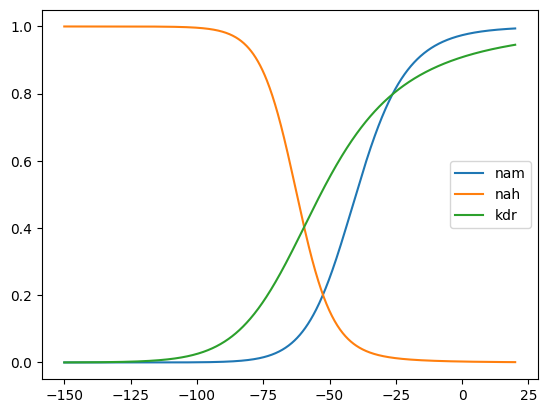

In [2]:
import matplotlib.pyplot as plt

plt.plot(v, nam, label = 'nam')
plt.plot(v, nah, label = 'nah')
plt.plot(v, kdr, label = 'kdr')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

from neuron import h
h.load_file('stdrun.hoc')

--No graphics will be displayed.


1.0

: 

In [ ]:
h.load_file("seg/template.hoc")
cell = h.Spiker_Izhikevich_seg()

NEURON: hh_seg is not a MECHANISM
 in template.hoc near line 33
         insert hh_seg
                     ^
        xopen("template.hoc")
      execute1("{xopen("te...")
    load_file("seg/templa...")


In [ ]:
cell.soma[0](0.5).cm

1.20784285

In [ ]:
# CI
ci = h.IClamp(cell.soma[0](0.5))
ci.amp = 0.1 # (nA)
ci.delay = 50
ci.dur = 150

# V recording
v = h.Vector().record(cell.soma[0](0.5)._ref_v)

In [ ]:
cell.soma[0](0.5).cm

1.20784285

In [ ]:
h.tstop = 200
h.dt = 0.1
h.steps_per_ms = 1 / h.dt
h.v_init = -50

In [ ]:
h.run()

0.0

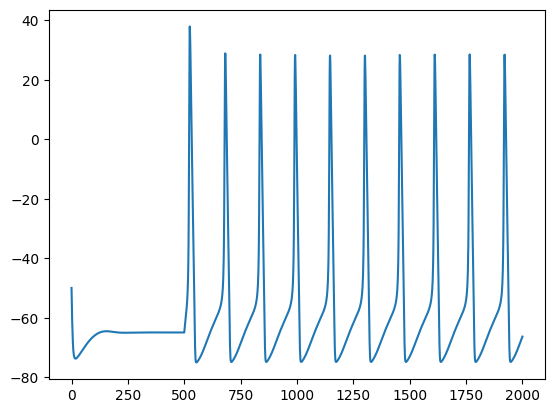

In [ ]:
plt.plot(v.as_numpy())